<a href="https://colab.research.google.com/github/phanng0605/forecasting_model/blob/main/02_Forecasting_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6751511 sha256=5a64b90a2f26726999ebcc928e9e3ab2566315c822cbb21e620c177a2235b9ed
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdsta

In [ ]:
!pip install gluonts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
!pip install mxnet-cu112

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.metrics import r2_score

EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """Simple error"""
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """Naive forecasting method which just repeats previous samples"""
    return actual[:-seasonality]


def _relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) / (
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
            + EPSILON
        )

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(
    actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None
):
    """Bounded Relative Error"""
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(
            _error(actual[seasonality:], _naive_forecasting(actual, seasonality))
        )
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """Geometric mean"""
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """Mean Squared Error"""
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """Root Mean Squared Error"""
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Root Mean Squared Error"""
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """Mean Error"""
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """Mean Absolute Error"""
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """Geometric Mean Absolute Error"""
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """Median Absolute Error"""
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """Mean Percentage Error"""
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(
        2.0
        * np.abs(actual - predicted)
        / ((np.abs(actual) + np.abs(predicted)) + EPSILON)
    )


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Error"""
    __mae = mae(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted) - __mae)) / (len(actual) - 1)
    )


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """Normalized Absolute Percentage Error"""
    __mape = mape(actual, predicted)
    return np.sqrt(
        np.sum(np.square(_percentage_error(actual, predicted) - __mape))
        / (len(actual) - 1)
    )


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """Root Mean Squared Scaled Error"""
    q = np.abs(_error(actual, predicted)) / mae(
        actual[seasonality:], _naive_forecasting(actual, seasonality)
    )
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """Integral Normalized Root Squared Error"""
    return np.sqrt(
        np.sum(np.square(_error(actual, predicted)))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """Root Relative Squared Error"""
    return np.sqrt(
        np.sum(np.square(actual - predicted))
        / np.sum(np.square(actual - np.mean(actual)))
    )


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Error"""
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """Relative Absolute Error (aka Approximation Error)"""
    return np.sum(np.abs(actual - predicted)) / (
        np.sum(np.abs(actual - np.mean(actual))) + EPSILON
    )


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Relative Absolute Error"""
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Median Relative Absolute Error"""
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Geometric Mean Relative Absolute Error"""
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Mean Bounded Relative Absolute Error"""
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """Unscaled Mean Bounded Relative Absolute Error"""
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """Mean Directional Accuracy"""
    return np.mean(
        (
            np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])
        ).astype(int)
    )


def bias(actual: np.ndarray, predicted: np.ndarray):
    """Mean forecast error(or Forecast Bias)"""
    return np.mean(actual - predicted)


METRICS = {
    "mse": mse,
    "rmse": rmse,
    "nrmse": nrmse,
    "me": me,
    "mae": mae,
    "mad": mad,
    "gmae": gmae,
    "mdae": mdae,
    "mpe": mpe,
    "mape": mape,
    "mdape": mdape,
    "smape": smape,
    "smdape": smdape,
    "maape": maape,
    "mase": mase,
    "std_ae": std_ae,
    "std_ape": std_ape,
    "rmspe": rmspe,
    "rmdspe": rmdspe,
    "rmsse": rmsse,
    "inrse": inrse,
    "rrse": rrse,
    "mre": mre,
    "rae": rae,
    "mrae": mrae,
    "mdrae": mdrae,
    "gmrae": gmrae,
    "mbrae": mbrae,
    "umbrae": umbrae,
    "mda": mda,
    "bias": bias,
    "r2": r2_score,
}


def evaluate(
    actual: np.ndarray, predicted: np.ndarray, metrics=("mae", "rmse", "mape", "r2")
):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print("Unable to compute metric {0}: {1}".format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))

In [ ]:
import pickle
import warnings
from math import sqrt

import lightgbm as lgb
import matplotlib as mpl
import numpy as np
import pandas as pd  
import pmdarima as pm
import tensorflow as tf
import xgboost as xgb
from bayes_opt import BayesianOptimization
from fbprophet import Prophet
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from matplotlib import pyplot as plt
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm

# from utils.metrics import evaluate


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")


# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

print(tf.__version__)

df = pd.read_csv('/content/gdrive/MyDrive/Techfest/Data/iphone14.csv', parse_dates=['Start_week'])

# df = pd.read_csv('/content/gdrive/MyDrive/Techfest/Data/iphone14.csv', parse_dates=['Start_week'])
# df.set_index('Start_week', inplace=True)

2.9.2


# Methods for time series forecasting

There are many methods that we can use for time series forecasting and there is not a clear winner. Model selection should always depend on how you data look and what are you trying to achieve. Some models may be more robust against outliers but perform worse than the more sensible and could still be the best choice depending on the use case.

When looking at your data the main split is wether we have extra regressors (features) to our time series or just the series. Based on this we can start exploring different methods for forecasting and their performance in different metrics.

In this section we will show models for both cases, time series with and without extra regressors.

**Prepare data before modeling**

In [ ]:
df

In [ ]:
look_back = []
IPhone_14 = df["Iphone_14"]
for i in range(0, len(IPhone_14)):
  if i==0:
    look_back.append(IPhone_14[i])
  else:
    look_back.append(IPhone_14[i-1])
df["look_back"] = pd.Series(look_back)
df

,Year,Week_ID,Start_week,End_week,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,Galaxy_S23,NumHoliday,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,ReleaseStat23,Campaign_Iphone,Campaign_Samsung,look_back
0,2022,38,2022-09-18,2022-09-24,36350,188380,0,32840,0,0,1,1,0,1,0,900.000000,400.000000,188380
1,2022,39,2022-09-25,2022-10-01,32950,168930,0,30440,0,0,1,1,0,1,0,450.000000,450.000000,188380
2,2022,40,2022-10-02,2022-10-08,33100,142680,0,31940,0,0,1,1,0,1,0,350.000000,200.000000,168930
3,2022,41,2022-10-09,2022-10-15,36280,126960,0,28420,0,0,1,1,0,1,0,650.000000,50.000000,142680
4,2022,42,2022-10-16,2022-10-22,33480,108280,0,30010,0,0,1,1,0,1,0,0.000000,850.000000,126960
5,2022,43,2022-10-23,2022-10-29,32130,93110,0,41150,0,1,1,1,0,1,0,350.000000,150.000000,108280
6,2022,44,2022-10-30,2022-11-05,36890,77260,0,27020,0,0,1,1,0,1,0,250.000000,550.000000,93110
7,2022,45,2022-11-06,2022-11-12,26710,75390,0,33320,0,0,1,1,0,1,0,300.000000,450.000000,77260
8,2022,46,2022-11-13,2022-11-19,15630,72030,0,28980,0,0,1,1,0,1,0,450.000000,300.000000,75390
9,2022,47,2022-11-20,2022-11-26,11480,57210,0,31310,0,0,1,1,0,1,0,350.000000,400.000000,72030


In [ ]:
df.set_index('Start_week', inplace=True)

In [ ]:
df.head()

,Year,Week_ID,End_week,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,Galaxy_S23,NumHoliday,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,ReleaseStat23,Campaign_Iphone,Campaign_Samsung,look_back
Start_week,,,,,,,,,,,,,,,,,
2022-09-18,2022,38,2022-09-24,36350,188380,0,32840,0,0,1,1,0,1,0,900.0,400.0,188380
2022-09-25,2022,39,2022-10-01,32950,168930,0,30440,0,0,1,1,0,1,0,450.0,450.0,188380
2022-10-02,2022,40,2022-10-08,33100,142680,0,31940,0,0,1,1,0,1,0,350.0,200.0,168930
2022-10-09,2022,41,2022-10-15,36280,126960,0,28420,0,0,1,1,0,1,0,650.0,50.0,142680
2022-10-16,2022,42,2022-10-22,33480,108280,0,30010,0,0,1,1,0,1,0,0.0,850.0,126960


In [ ]:
df = df.drop(["Year", "Galaxy_S23", "Week_ID", "ReleaseStat23", "End_week"], axis=1)
df

,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,NumHoliday,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,Campaign_Iphone,Campaign_Samsung,look_back
Start_week,,,,,,,,,,,,
2022-09-18,36350,188380,0,32840,0,1,1,0,1,900.000000,400.000000,188380
2022-09-25,32950,168930,0,30440,0,1,1,0,1,450.000000,450.000000,188380
2022-10-02,33100,142680,0,31940,0,1,1,0,1,350.000000,200.000000,168930
2022-10-09,36280,126960,0,28420,0,1,1,0,1,650.000000,50.000000,142680
2022-10-16,33480,108280,0,30010,0,1,1,0,1,0.000000,850.000000,126960
2022-10-23,32130,93110,0,41150,1,1,1,0,1,350.000000,150.000000,108280
2022-10-30,36890,77260,0,27020,0,1,1,0,1,250.000000,550.000000,93110
2022-11-06,26710,75390,0,33320,0,1,1,0,1,300.000000,450.000000,77260
2022-11-13,15630,72030,0,28980,0,1,1,0,1,450.000000,300.000000,75390


In [ ]:
df.shape

(17, 12)

In [ ]:
# We split our dataset to be able to evaluate our models

resultsDict = {}
predictionsDict = {}


split_date = '2022-12-04'
df_training = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]
print(f"{len(df_training)} days of training data \n {len(df_test)} days of testing data ")

df_training.to_csv('/content/gdrive/MyDrive/Techfest/Data/training14.csv')
df_test.to_csv('/content/gdrive/MyDrive/Techfest/Data/test14.csv')

12 days of training data 
 5 days of testing data 


It is also very important to include some naive forecast as the series mean or previous value to make sure our models perform better than the simplest of the simplest. We dont want to introduce any complexity if it does not provides any performance gain.

In [ ]:
# Also add the naive mean average value
mean = df_training.Iphone_14.mean()
mean = np.array([mean for u in range(len(df_test))])
resultsDict['Naive mean'] = evaluate(df_test.Iphone_14, mean)
predictionsDict['Naive mean'] = mean
resultsDict['Last week value'] = evaluate(
    df_test.Iphone_14, df_test.look_back)
predictionsDict['Last week value'] = df_test.look_back.values

## Univariate-time-series-forecasting

In this section we will focus on time series forecasting methods capable of only looking at the target variable. This means no other regressors (more variables) can be added into the model.

### Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps. This method expects our time series to be non stationary in order to perform adecuately (no trend or seasonality)

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = SimpleExpSmoothing(temp_train.Iphone_14)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['SES'] = evaluate(df_test.Iphone_14, yhat.values)
predictionsDict['SES'] = yhat.values

100%|██████████| 5/5 [00:00<00:00, 83.02it/s]


In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
ses_mse = round(mean_squared_error(df_test.Iphone_14.values, yhat.values), 2)
ses_mse

239060104.27

In [ ]:
print("Test MSE linear: %.2f" % ses_mse)

Test MSE linear: 239060104.27


### Holt Winter’s Exponential Smoothing (HWES)

[HWES](https://machinelearningmastery.com/how-to-grid-search-triple-exponential-smoothing-for-time-series-forecasting-in-python/) or also known as triple exponential smoothing

In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = ExponentialSmoothing(temp_train.Iphone_14)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(temp_train), end=len(temp_train))
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['HWES'] = evaluate(df_test.Iphone_14, yhat.values)
predictionsDict['HWES'] = yhat.values

100%|██████████| 5/5 [00:00<00:00, 106.16it/s]


In [ ]:
hwes_mse = round(mean_squared_error(df_test.Iphone_14.values, yhat.values), 2)
hwes_mse

238791994.16

### Autoregression (AR)
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps. Parameters of the model:

- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).


In [ ]:
# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = AutoReg(temp_train.Iphone_14, 5)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AR'] = evaluate(df_test.Iphone_14, yhat.values)
predictionsDict['AR'] = yhat.values

100%|██████████| 5/5 [00:00<00:00, 87.08it/s]


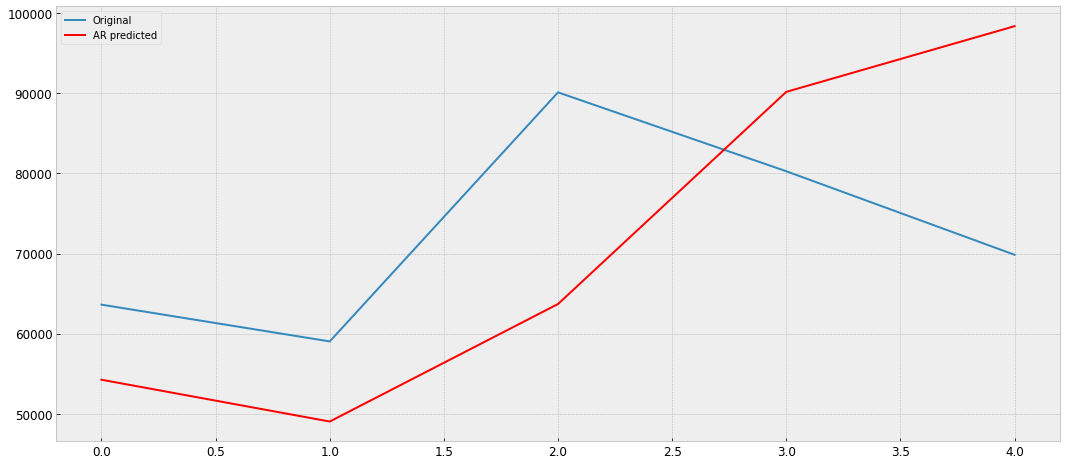

In [ ]:
plt.plot(df_test.Iphone_14.values, label='Original')
plt.plot(yhat.values, color='red', label='AR predicted')
plt.legend()

In [ ]:
ar_mse = round(mean_squared_error(df_test.Iphone_14.values, yhat.values), 2)
ar_mse

359903217.44

### Moving Average (MA)

The Moving Average (MA) method models the next step in the sequence as the average of a window of observations at prior time steps. Parameters of the model:


- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.



In [ ]:
# MA example

# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = ARMA(temp_train.Iphone_14, order=(0, 1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['MA'] = evaluate(df_test.Iphone_14I, yhat.values)
predictionsDict['MA'] = yhat.values

  0%|          | 0/5 [00:00<?, ?it/s]


NotImplementedError: ignored

In [ ]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='MA predicted')
plt.legend()

### Autoregressive Moving Average (ARMA)

This method will basically join the previous two `AR` and `MA`. Model parameters will be the sum of the two.

- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.



In [ ]:
# ARMA example

# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = ARMA(temp_train.Iphone_14, order=(1, 1))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['ARMA'] = evaluate(df_test.Iphone_14, yhat.values)
predictionsDict['ARMA'] = yhat.values

In [ ]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.values, color='red', label='ARMA predicted')
plt.legend()

### Autoregressive integrated moving average (ARIMA)

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

* Number of AR (Auto-Regressive) terms (p): p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
* Number of Differences (d): d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
* Number of MA (Moving Average) terms (q): q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

**Tuning ARIMA parameters**

Non stationarity series will require level of differencing (d) >0 in ARIMA
Select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots
AUTOARIMA

Note: A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

In [ ]:
# ARIMA example

# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.Iphone_14, order=(1, 0, 0))
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['ARIMA'] = evaluate(df_test.Iphone_14, yhat.values)
predictionsDict['ARIMA'] = yhat.values

100%|██████████| 5/5 [00:00<00:00, 15.35it/s]


In [ ]:
arima_mse = round(mean_squared_error(df_test.Iphone_14.values, yhat.values), 2)
arima_mse

233480361.2

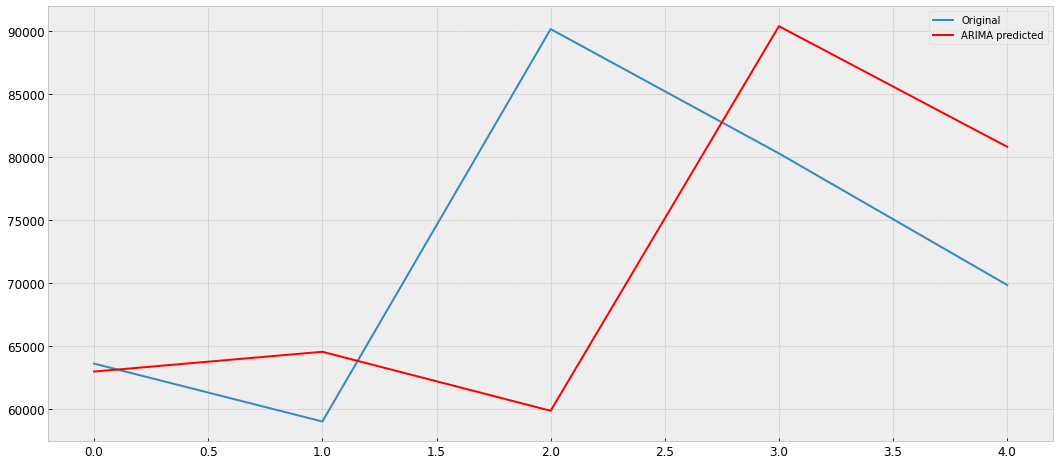

In [ ]:
plt.plot(df_test.Iphone_14.values, label='Original')
plt.plot(yhat.values, color='red', label='ARIMA predicted')
plt.legend()

#### Auto ARIMA

In [ ]:
# building the model

autoModel = pm.auto_arima(df_training.Iphone_14, trace=True,
                          error_action='ignore', suppress_warnings=True, seasonal=False)
autoModel.fit(df_training.Iphone_14)

In [ ]:
order = autoModel.order
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = ARIMA(temp_train.Iphone_14, order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoARIMA {0}'.format(order)] = evaluate(
    df_test.Iphone_14, yhat)
predictionsDict['AutoARIMA {0}'.format(order)] = yhat.values

In [ ]:
plt.plot(df_test.Iphone_14.values, label='Original')
plt.plot(yhat.values, color='red', label='AutoARIMA {0}'.format(order))
plt.legend()

In [ ]:
auto_arima_mse = round(mean_squared_error(df_test.Iphone_14.values, yhat.values), 2)
auto_arima_mse

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)
Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

__Trend Elements:__

There are three trend elements that require configuration. They are the same as the ARIMA model, specifically:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

__Seasonal Elements:__

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period. For example, an S of 12 for monthly data suggests a yearly seasonal cycle.

__SARIMA notation:__
SARIMA(p,d,q)(P,D,Q,m)

In [ ]:
# SARIMA example

# Walk throught the test data, training and predicting 1 day ahead for all the test data
index = len(df_training)
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = SARIMAX(temp_train.Iphone_14, order=(
        1, 0, 0), seasonal_order=(0, 0, 0, 3))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['SARIMAX'] = evaluate(df_test.Iphone_14, yhat.values)
predictionsDict['SARIMAX'] = yhat.values

100%|██████████| 5/5 [00:00<00:00, 16.48it/s]


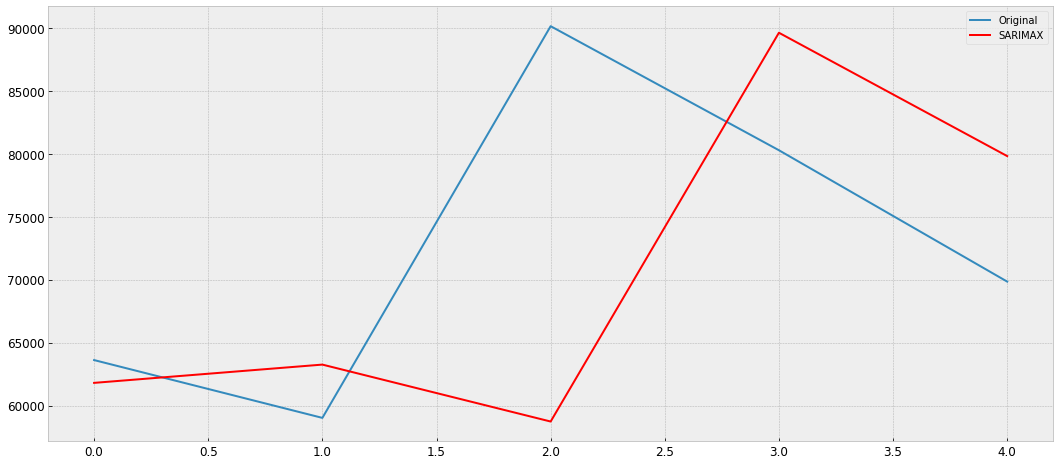

In [ ]:
plt.plot(df_test.Iphone_14.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()

In [ ]:
sarima_mse = round(mean_squared_error(df_test.Iphone_14.values, yhat.values), 2)
sarima_mse

238568811.96

#### Auto - SARIMA

[auto_arima documentation for selecting best model](https://www.alkaline-ml.com/pmdarima/tips_and_tricks.html)

In [ ]:
# building the model
autoModel = pm.auto_arima(df_training.Iphone_14, trace=True, error_action='ignore',
                          suppress_warnings=True, seasonal=True, m=6, stepwise=True)
autoModel.fit(df_training.Iphone_14)

ValueError: ignored

In [ ]:
order = autoModel.order
seasonalOrder = autoModel.seasonal_order
yhat = list()
for t in tqdm(range(len(df_test.Iphone_14))):
    temp_train = df[:len(df_training)+t]
    model = SARIMAX(temp_train.Iphone_14, order=order,
                    seasonal_order=seasonalOrder)
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(
        start=len(temp_train), end=len(temp_train), dynamic=False)
    yhat = yhat + [predictions]

yhat = pd.concat(yhat)
resultsDict['AutoSARIMAX {0},{1}'.format(order, seasonalOrder)] = evaluate(
    df_test.Iphone_14, yhat.values)
predictionsDict['AutoSARIMAX {0},{1}'.format(
    order, seasonalOrder)] = yhat.values

100%|██████████| 5/5 [00:00<00:00, 38.42it/s]


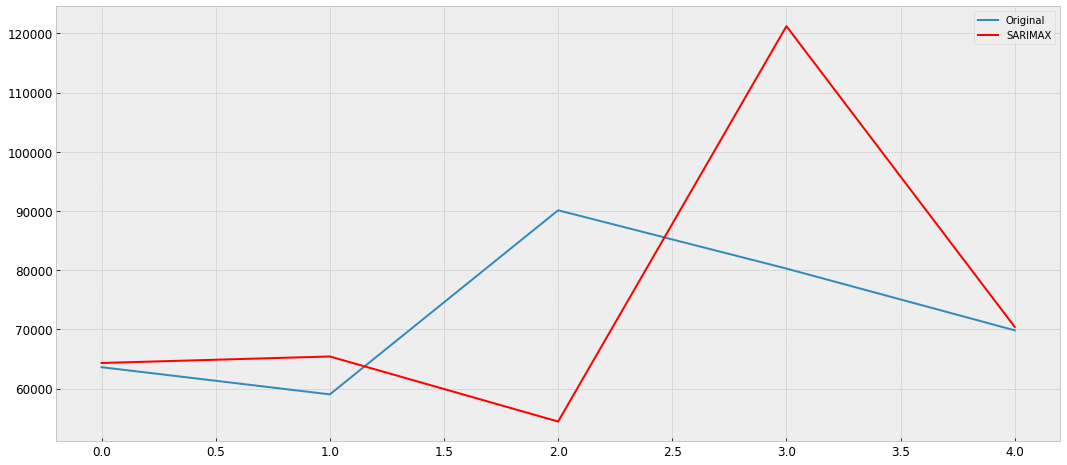

In [ ]:
plt.plot(df_test.Iphone_14.values, label='Original')
plt.plot(yhat.values, color='red', label='SARIMAX')
plt.legend()

### Prophet

Prophet is a model released by [facebook](https://github.com/facebook/prophet). Is essentially a curve fitting approach, very similar in spirit to how BSTS models trend and seasonality, except that it uses generalized additive models instead of a state-space representation to describe each component.


In [ ]:
# Prophet needs some specifics data stuff, coment it here
prophet_training = df_training.rename(
    columns={'pollution_today': 'y'})  # old method
prophet_training['ds'] = prophet_training.index
prophet_training.index = pd.RangeIndex(len(prophet_training.index))

prophet_test = df_test.rename(columns={'pollution_today': 'y'})  # old method
prophet_test['ds'] = prophet_test.index
prophet_test.index = pd.RangeIndex(len(prophet_test.index))

In [ ]:
prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False
).add_seasonality(
    name='monthly',
    period=30.5,
    fourier_order=55
).add_seasonality(
    name='daily',
    period=1,
    fourier_order=15
).add_seasonality(
    name='weekly',
    period=7,
    fourier_order=25
).add_seasonality(
    name='yearly',
    period=365.25,
    fourier_order=20
).add_seasonality(
    name='quarterly',
    period=365.25/4,
    fourier_order=55
).add_country_holidays(country_name='China')

In [ ]:
prophet.fit(prophet_training)
yhat = prophet.predict(prophet_test)
resultsDict['Prophet univariate'] = evaluate(
    df_test.Iphone_14, yhat.yhat.values)
predictionsDict['Prophet univariate'] = yhat.yhat.values

In [ ]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.yhat, color='red', label='Prophet univariate')
plt.legend()

## Multivariate time series forecasting

In [ ]:
# ADD time features to our model
def create_time_features(df, target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

In [ ]:
X_train_df, y_train = create_time_features(
    df_training, target='Iphone_14')
X_test_df, y_test = create_time_features(df_test, target='Iphone_14')
scaler = StandardScaler()
scaler.fit(X_train_df)  # No cheating, never scale on the training+test!
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [ ]:
X_test

array([[ -1.98344903,   0.        ,  -0.21394577,  -0.30151134,
         -3.31662479,   0.        ,   0.        ,   0.        ,
         -0.40792711,   0.99299394,  -1.09571521,   0.        ,
          0.        ,   0.4472136 ,   1.96116135,   0.        ,
          1.88293774,  -0.50869759,   1.38997251,  -0.56688414,
          1.88293774],
       [ -1.98344903,   0.        ,   0.66840873,  -0.30151134,
         -3.31662479,   0.        ,   0.        ,   0.        ,
         -0.40792711,   0.02026518,  -1.05709186,   0.        ,
          0.        ,   0.4472136 ,   1.96116135,   0.        ,
          2.17262047,   0.47233339,   1.61130174,   0.2137432 ,
          2.17262047],
       [ -1.98344903,   0.        ,   3.09831957,   3.31662479,
         -3.31662479,   0.        ,   0.        ,   0.        ,
         -0.83359019,  -1.43882795,  -1.15503726,   0.        ,
          0.        ,   0.4472136 ,   1.96116135,   0.        ,
          2.4623032 ,   1.35388846,   1.11794329,   0.9943

### Linear models

#### Bayesian regression

In [ ]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['BayesianRidge'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['BayesianRidge'] = yhat

#### Lasso

In [ ]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['Lasso'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['Lasso'] = yhat

### Tree models

#### Randomforest

In [ ]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['Randomforest'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['Randomforest'] = yhat

#### XGBoost

In [ ]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(X_train, y_train, 
        verbose=True)  # Change verbose to True if you want to see it train
yhat = reg.predict(X_test)
resultsDict['XGBoost'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['XGBoost'] = yhat

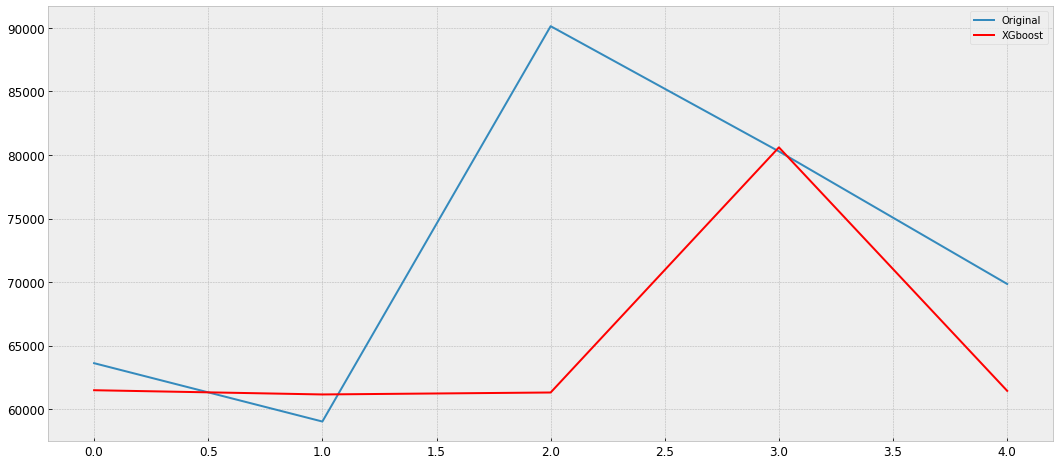

In [ ]:
plt.plot(df_test.Iphone_14.values, label='Original')
plt.plot(yhat, color='red', label='XGboost')
plt.legend()

#### Lightgbm

A tree gradient boosting model by [microsoft](https://github.com/microsoft/LightGBM)

In [ ]:
lightGBM = lgb.LGBMRegressor()
lightGBM.fit(X_train, y_train)
yhat = lightGBM.predict(X_test)
resultsDict['Lightgbm'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['Lightgbm'] = yhat

### Support vector machines

Explain multiple kernels balbla

In [ ]:
reg = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['SVM RBF'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['SVM RBF'] = yhat

### Nearest neighbors

In [ ]:
reg = KNeighborsRegressor(n_neighbors=2)
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['Kneighbors'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['Kneighbors'] = yhat

### Prophet multivariate

In [ ]:
prophet = Prophet(
    growth='linear',
    seasonality_mode='multiplicative',
    daily_seasonality=True,
).add_country_holidays(country_name='China')


for col in prophet_training.columns:
    if col not in ["ds", "y"]:
        prophet.add_regressor(col)

In [ ]:
prophet.fit(prophet_training)
yhat = prophet.predict(prophet_test)
resultsDict['Prophet multivariate'] = evaluate(y_test, yhat.yhat.values)
predictionsDict['Prophet multivariate'] = yhat.yhat.values

In [ ]:
plt.plot(df_test.pollution_today.values, label='Original')
plt.plot(yhat.yhat, color='red', label='Prophet multivariate')
plt.legend()

### Deep learning

#### Tensorlfow LSTM

LSTM are a special type of neural network architecture, you can read more on this [here](https://www.tensorflow.org/guide/keras/rnn)

We will be trying a LSTM model for our benchmark but we will need to reshape our data to provide the network a window of previous samples (past days data) for each y target value. Find the code here

In [ ]:
# For our dl model we will create windows of data that will be feeded into the datasets, for each timestemp T we will append the data from T-7 to T to the Xdata with target Y(t)
BATCH_SIZE = 3
BUFFER_SIZE = 3
WINDOW_LENGTH = 10


def window_data(X, Y, window=7):
    '''
    The dataset length will be reduced to guarante all samples have the window, so new length will be len(dataset)-window
    '''
    x = []
    y = []
    for i in range(window-1, len(X)):
        x.append(X[i-window+1:i+1])
        y.append(Y[i])
    return np.array(x), np.array(y)


# Since we are doing sliding, we need to join the datasets again of train and test
X_w = np.concatenate((X_train, X_test))
y_w = np.concatenate((y_train, y_test))

X_w, y_w = window_data(X_w, y_w, window=WINDOW_LENGTH)
X_train_w = X_w[:-len(X_test)]
y_train_w = y_w[:-len(X_test)]
X_test_w = X_w[-len(X_test):]
y_test_w = y_w[-len(X_test):]

# Check we will have same test set as in the previous models, make sure we didnt screw up on the windowing
print(f"Test set equal: {np.array_equal(y_test_w,y_test)}")

train_data = tf.data.Dataset.from_tensor_slices((X_train_w, y_train_w))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data = tf.data.Dataset.from_tensor_slices((X_test_w, y_test_w))
val_data = val_data.batch(BATCH_SIZE).repeat()

Test set equal: True


In [ ]:
dropout = 0.0
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(
        128, input_shape=X_train_w.shape[-2:], dropout=dropout),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='rmsprop', loss='mae')

# logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S") #Support for tensorboard tracking!
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

model_history = simple_lstm_model.fit(train_data, epochs=EPOCHS,
                                      steps_per_epoch=EVALUATION_INTERVAL,
                                      validation_data=val_data, validation_steps=50)  # ,callbacks=[tensorboard_callback]) #Uncomment this line for tensorboard support

Epoch 1/10
200/200 [==============================] - 8s 21ms/step - loss: 44626.6719 - val_loss: 52558.3711
Epoch 2/10
200/200 [==============================] - 3s 15ms/step - loss: 1304.5209 - val_loss: 37449.2539
Epoch 3/10
200/200 [==============================] - 3s 16ms/step - loss: 320.9142 - val_loss: 21586.5801
Epoch 4/10
200/200 [==============================] - 3s 16ms/step - loss: 295.3691 - val_loss: 27185.2129
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 294.0962 - val_loss: 20049.9492
Epoch 6/10
200/200 [==============================] - 6s 29ms/step - loss: 294.5821 - val_loss: 33691.3125
Epoch 7/10
200/200 [==============================] - 5s 24ms/step - loss: 294.4848 - val_loss: 35288.6875
Epoch 8/10
200/200 [==============================] - 3s 16ms/step - loss: 294.4099 - val_loss: 36119.9688
Epoch 9/10
200/200 [==============================] - 3s 17ms/step - loss: 294.3387 - val_loss: 36248.1992
Epoch 10/10
200/200 [=============

In [ ]:
yhat = simple_lstm_model.predict(X_test_w).reshape(1, -1)[0]
resultsDict['Tensorflow simple LSTM'] = evaluate(y_test, yhat)
predictionsDict['Tensorflow simple LSTM'] = yhat

1/1 [==============================] - 1s 802ms/step


In [ ]:
resultsDict['Tensorflow simple LSTM']

{'mae': 36292.33909912109,
 'rmse': 48744.58712391468,
 'mape': 0.4733644124886213,
 'r2': -17.602607993299248}

#### DeepAR

[DeepAR](https://arxiv.org/pdf/1704.04110.pdf) is a deep learning architecture released by amazon

In [ ]:
features = ['dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain',
            'pollution_yesterday', 'hour', 'dayofweek', 'quarter', 'month',
            'year', 'dayofyear', 'sin_day', 'cos_day', 'dayofmonth', 'weekofyear']

scaler = StandardScaler()
scaler.fit(X_train)  # No cheating, never scale on the training+test!
df_training[features] = scaler.transform(df_training[features])
df_test[features] = scaler.transform(df_test[features])


training_data = ListDataset(
    [{"start": df_training.index[0], "target": df_training.pollution_today,
      'feat_dynamic_real': [df_training[feature] for feature in features]
      }],
    freq="d"
)
test_data = ListDataset(
    [{"start": df_test.index[0], "target": df_test.pollution_today,
      'feat_dynamic_real': [df_test[feature] for feature in features]
      }],
    freq="d"
)

In [ ]:
estimator = DeepAREstimator(freq="d",
                            prediction_length=1, context_length=30,
                            trainer=Trainer(epochs=5))

predictor = estimator.train(training_data=training_data)


forecast_it, ts_it = make_evaluation_predictions(
    test_data, predictor=predictor, num_samples=len(df_test))

forecasts = list(forecast_it)
tss = list(ts_it)


In [ ]:
yhat = forecasts[0].samples.reshape(1, -1)[0]
resultsDict['DeepAR'] = evaluate(y_test, yhat)
predictionsDict['DeepAR'] = yhat

# Appendix

## Hyperparameter optimization

We have seen models with really low amount of parameters (Auto regression models,Linear models) or with crazy ammount (Trees,Prophet). Some models are more robust to different data types/shapes and dont need any hyperparameter optimization but some other can give you poor results if the parameters are not tunned, we can tune the model parameters to better fit our dataset properties. We can do this manually with pure knowledge about the model but this becames really hard when the model contains a lot of different parameters, this is when hyperparameter optimization comes handy.

Hyperparameter optimization is trying to find the best parameters in an automatic way. We present two methods that are used frequently:

* **Grid search** Brute force method to try all different possible combinations of parameters. Will always find the best combination
* **Bayesian processes** "Brute" force method, optimizes parameter search by using gausian processes to model each parameter distribution and don't go over all the possible values. Really nice library for python https://github.com/fmfn/BayesianOptimization, this method will not always find the best combination of parameters

We provide 1 example for each method

### Grid search - SVM

With grid search we can use the handy sklearn implementation

In [ ]:
reg = GridSearchCV(svm.SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg.fit(X_train, y_train)
yhat = reg.predict(X_test)
resultsDict['SVM RBF GRID SEARCH'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['SVM RBF GRID SEARCH'] = yhat

In [ ]:
increase = 1 - (resultsDict['SVM RBF GRID SEARCH']
                ['rmse']/resultsDict['SVM RBF']['rmse'])
print(
    f"Grid search Tunned SVM is {increase*100}% better than the SVM with default parameters")

Grid search Tunned SVM is 1.8756359152597213% better than the SVM with default parameters




```
# This is formatted as code
```

### Bayesian processes - Xgboost

In [ ]:
def rms(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))


my_scorer = make_scorer(rms, greater_is_better=False)
pbounds = {
    'n_estimators': (100, 10000),
    'max_depth': (3, 15),
    'min_samples_leaf': (1, 4),
    'min_samples_split': (2, 10),
}


def rf_hyper_param(n_estimators,
                   max_depth,
                   min_samples_leaf,
                   min_samples_split):

    max_depth = int(max_depth)
    n_estimators = int(n_estimators)

    clf = RandomForestRegressor(n_estimators=n_estimators,
                                max_depth=int(max_depth),
                                min_samples_leaf=int(min_samples_leaf),
                                min_samples_split=int(min_samples_split),
                                n_jobs=1)

    return -np.mean(cross_val_score(clf, X_train, y_train, cv=3))


optimizer = BayesianOptimization(
    f=rf_hyper_param,
    pbounds=pbounds,
    random_state=1,
)

In [ ]:
optimizer.maximize(
    init_points=3,
    n_iter=20,
    acq='ei'
)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 33.15     | 8.004     | 3.161     | 2.001     | 3.093e+03 |
| 2         | 22.23     | 4.761     | 1.277     | 3.49      | 3.521e+03 |
| 3         | 27.88     | 7.761     | 2.616     | 5.354     | 6.884e+03 |
| 4         | 21.83     | 5.872     | 1.362     | 3.762     | 3.091e+03 |
| 5         | 33.57     | 8.311     | 2.24      | 6.382     | 7.468e+03 |
| 6         | 41.63     | 10.48     | 1.67      | 9.673     | 8.066e+03 |
| 7         | 42.13     | 3.254     | 3.424     | 9.719     | 7.051e+03 |
| 8         | 22.53     | 7.373     | 1.067     | 3.219     | 9.718e+03 |
| 9         | 40.85     | 14.94     | 1.976     | 8.535     | 541.9     |
| 10        | 41.45     | 14.77     | 1.811     | 8.47      | 4.521e+03 |
| 11        | 27.43     | 6.899     | 2.907     | 5.204     | 7.54e+03  |
| 12        | 33.28     | 6.671     | 

In [ ]:
params = optimizer.max['params']

# Converting the max_depth and n_estimator values from float to int
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])
params['min_samples_leaf'] = int(params['min_samples_leaf'])
params['min_samples_split'] = int(params['min_samples_split'])

# Initialize an XGBRegressor with the tuned parameters and fit the training data
tunned_rf = RandomForestRegressor(**params)
# Change verbose to True if you want to see it train
tunned_rf.fit(X_train, y_train)

yhat = tunned_rf.predict(X_test)
resultsDict['Randomforest tunned'] = evaluate(y_test, yhat)

In [ ]:
predictionsDict['Randomforest tunned'] = yhat

In [ ]:
increase = 1 - (resultsDict['Randomforest tunned']
                ['rmse']/resultsDict['Randomforest']['rmse'])
print(
    f"Bayesian optimized Randomforest is {increase*100}% better than the Randomforest with default parameters")

Bayesian optimized Randomforest is 0.7773076221535113% better than the Randomforest with default parameters


In [ ]:
resultsDict['Randomforest tunned']

{'mae': 26929.733605569014,
 'rmse': 29600.0628202876,
 'mape': 0.4018913193862419,
 'r2': -5.859718713305972}

## Ensembling

Ensembling refers to combine multiple models to achieve a better performance, most of the time this only makes sense when models have similar performance but predict values differently so we try to get the best of each model.

We will pick our 3 top performing models and look at the correlation of their residuals, the less correlated the better

In [ ]:
models = ['Tensorflow simple LSTM',
          'Lightgbm',
          'XGBoost']
resis = pd.DataFrame(data={k: df_test.Iphone_14.values -
                     v for k, v in predictionsDict.items()})[models]
corr = resis.corr()
print("Residuals correlation")
corr.style.background_gradient(cmap='coolwarm')

We can see how both tree models are a bit similar ~0.87 but quite different from the Deep Learning model with corr ~0.7. In this case it would really make sense to ensemble the methods and see how they behave. The most reasonable combinations to try would be

* XGboost + Tensorflow
* XGBoost + Lightgbm
* Lightgbm + Tensorflow
* XGBoost + Lightgbm + Tensorflow

We will just sum the predictions of each model with similar weights (0.5 if two models, 0.333 if three)

In [ ]:
predictionsDict['EnsembleXG+LIGHT'] = (
    predictionsDict['XGBoost'] + predictionsDict['Lightgbm'])/2
resultsDict['EnsembleXG+LIGHT'] = evaluate(
    df_test.Iphone_14.values, predictionsDict['EnsembleXG+LIGHT'])

predictionsDict['EnsembleXG+LIGHT+TF'] = (predictionsDict['XGBoost'] +
                                          predictionsDict['Lightgbm'] + predictionsDict['Tensorflow simple LSTM'])/3
resultsDict['EnsembleXG+LIGHT+TF'] = evaluate(
    df_test.Iphone_14.values, predictionsDict['EnsembleXG+LIGHT+TF'])

predictionsDict['EnsembleLIGHT+TF'] = (
    predictionsDict['Lightgbm'] + predictionsDict['Tensorflow simple LSTM'])/2
resultsDict['EnsembleLIGHT+TF'] = evaluate(
    df_test.Iphone_14.values, predictionsDict['EnsembleLIGHT+TF'])

predictionsDict['EnsembleXG+TF'] = (predictionsDict['XGBoost'] +
                                    predictionsDict['Tensorflow simple LSTM'])/2
resultsDict['EnsembleXG+TF'] = evaluate(
    df_test.Iphone_14.values, predictionsDict['EnsembleXG+TF'])

In [ ]:

with open('/content/gdrive/MyDrive/Techfest/Code/scores.pickle', 'wb') as handle:
    pickle.dump(resultsDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('/content/gdrive/MyDrive/Techfest/Code/predictions.pickle', 'wb') as handle:
    pickle.dump(predictionsDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
results = pd.DataFrame({
    'Model': [ 'Simple Exponential Smoothing (SES)', 
              'Holt Winter’s Exponential Smoothing (HWES)',
              'AR',  
              'ARIMA',
              'Auto ARIMA',
              'SARIMA',
              'Bayesian regression',
              'Lasso regression'],
    "MSE":            [ses_mse,
                      hwes_mse,
                      ar_mse,
                      arima_mse,
                      auto_arima_mse,
                      sarima_mse,
                       Bayesian_regression_mse
                     ]})
result_df = results.sort_values(by='MSE', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

In [ ]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="MSE",data=result_df)
labels = (result_df["MSE"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

In [ ]:
resultsDict

In [ ]:
predictionsDict

In [ ]:
X = []
mae = []
rmse = []
for x in resultsDict:
  X.append(x)
  for value in x


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Naive mean','AR','ARIMA','SARIMAX']
mae = [30028.833333333325,20,20,40]
rmse = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, mae, 0.4, label = 'MAE')
plt.bar(X_axis + 0.2, rmse, 0.4, label = 'RMSE')
  
plt.xticks(X_axis, X)
plt.xlabel("Methods")
plt.ylabel("Value")
plt.title("Methods' Performance")
plt.legend()
plt.show()

In [ ]:
resultsDict.pop("Naive mean")


{'mae': 30028.833333333325,
 'rmse': 32085.148080710343,
 'mape': 0.4473616362094459,
 'r2': -7.0598904341302156}

In [ ]:
resultsDict.pop("Last week value")

{'mae': 11556.0,
 'rmse': 15474.893214494245,
 'mape': 0.14465598443030503,
 'r2': -0.8748924650330894}

In [ ]:
resultsDict

{'SES': {'mae': 11535.32488421004,
  'rmse': 15461.56862271609,
  'mape': 0.14441655851968044,
  'r2': -0.8716651185203563},
 'HWES': {'mae': 11532.566655891207,
  'rmse': 15452.89597975633,
  'mape': 0.14439660992811634,
  'r2': -0.8695660131534277},
 'AR': {'mae': 16853.005996671076,
  'rmse': 18971.11534509055,
  'mape': 0.2284374344931058,
  'r2': -1.8177779816610578},
 'ARIMA': {'mae': 11487.595739321116,
  'rmse': 15280.064175146994,
  'mape': 0.14430207137823958,
  'r2': -0.8279798263980125},
 'AutoARIMA (0, 2, 0)': {'mae': 16866.000000000007,
  'rmse': 24464.174214553,
  'mape': 0.20679124664044823,
  'r2': -3.6857829049795816},
 'SARIMAX': {'mae': 11345.143979963912,
  'rmse': 15445.672920125397,
  'mape': 0.14145568617413906,
  'r2': -0.8678186603247235},
 'BayesianRidge': {'mae': 30028.835110125678,
  'rmse': 32085.14953320013,
  'mape': 0.4473616586744035,
  'r2': -7.059891163870265},
 'Lasso': {'mae': 27901.27269660736,
  'rmse': 35949.179207012065,
  'mape': 0.35613071806

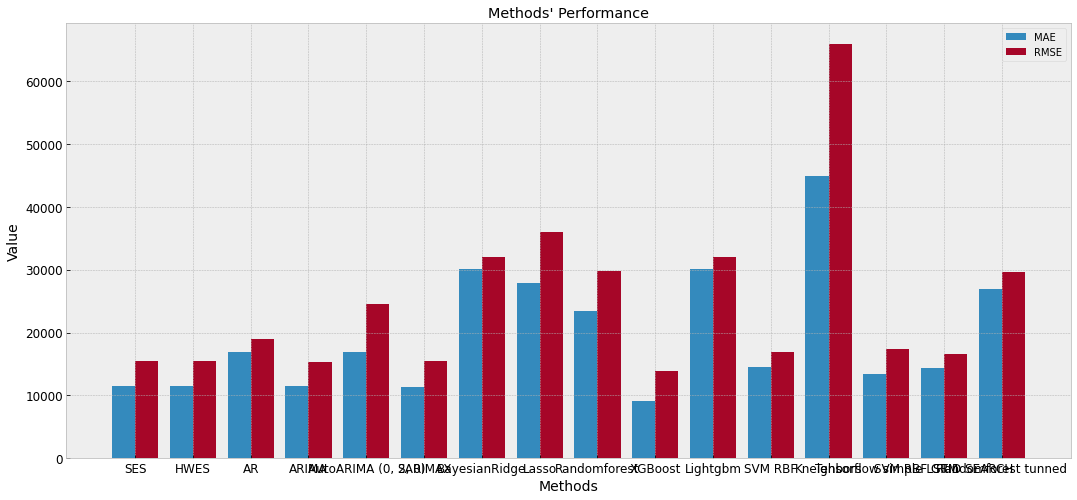

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

X = resultsDict.keys()
mae = []
rmse = []
for x in resultsDict:
  mae.append(resultsDict[x]['mae'])
  rmse.append(resultsDict[x]['rmse'])

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, mae, 0.4, label = 'MAE')
plt.bar(X_axis + 0.2, rmse, 0.4, label = 'RMSE')
  
plt.xticks(X_axis, X)
plt.xlabel("Methods")
plt.ylabel("Value")
plt.title("Methods' Performance")
plt.legend()
plt.show()


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Techfest/Data/dataset_final.csv', parse_dates=['Start_week'])

In [ ]:
df.head()

,Year,Week_ID,Start_week,End_week,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,Galaxy_S23,NumHoliday,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,ReleaseStat23,Campaign_Iphone,Campaign_Samsung
0,2022,1,2022-01-02,2022-01-08,52360,0,25630,0,0,0,1,0,1,0,0,100.0,100.0
1,2022,2,2022-01-09,2022-01-15,50360,0,22940,0,0,0,1,0,1,0,0,600.0,600.0
2,2022,3,2022-01-16,2022-01-22,48340,0,21560,0,0,0,1,0,1,0,0,350.0,200.0
3,2022,4,2022-01-23,2022-01-29,45390,0,22450,0,0,0,1,0,1,0,0,750.0,750.0
4,2022,5,2022-01-30,2022-02-05,66780,0,21460,0,0,1,1,0,1,0,0,900.0,500.0


In [ ]:
df.set_index('Start_week', inplace=True)

In [ ]:
df = df.drop(["Year", "Galaxy_S23", "Week_ID", "ReleaseStat23", "End_week"], axis=1)
df

,Iphone_13,Iphone_14,Galaxy_S21,Galaxy_S22,NumHoliday,ReleaseStat13,ReleaseState14,ReleaseStat21,ReleaseStat22,Campaign_Iphone,Campaign_Samsung
Start_week,,,,,,,,,,,
2022-01-02,52360,0,25630,0,0,1,0,1,0,100.000000,100.000000
2022-01-09,50360,0,22940,0,0,1,0,1,0,600.000000,600.000000
2022-01-16,48340,0,21560,0,0,1,0,1,0,350.000000,200.000000
2022-01-23,45390,0,22450,0,0,1,0,1,0,750.000000,750.000000
2022-01-30,66780,0,21460,0,1,1,0,1,0,900.000000,500.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-19,0,0,0,0,0,0,1,0,1,335.813492,433.531746
2023-02-26,0,0,0,0,0,0,1,0,1,425.000000,192.857143
2023-03-05,0,0,0,0,0,0,1,0,0,448.214286,357.142857


In [ ]:
model.predict(np.array([[49], [50],[51],[52]]))

In [ ]:
# ADD time features to our model
def create_time_features(df, target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['sin_day'] = np.sin(df['dayofyear'])
    df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'], axis=1)
    if target:
        y = df[target]
        X = X.drop([target], axis=1)
        return X, y

    return X

In [ ]:
X_train_df, y_train = create_time_features(
    df_training, target='Iphone_14')
X_test_df, y_test = create_time_features(df_test, target='Iphone_14')
scaler = StandardScaler()
scaler.fit(X_train_df)  # No cheating, never scale on the training+test!
X_train = scaler.transform(X_train_df)
X_test = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train, columns=X_train_df.columns)
X_test_df = pd.DataFrame(X_test, columns=X_test_df.columns)

In [ ]:
X_train_df.columns

Index(['Iphone_13', 'Galaxy_S21', 'Galaxy_S22', 'NumHoliday', 'ReleaseStat13',
       'ReleaseState14', 'ReleaseStat21', 'ReleaseStat22', 'Campaign_Iphone',
       'Campaign_Samsung', 'look_back', 'hour', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'sin_day', 'cos_day', 'dayofmonth',
       'weekofyear'],
      dtype='object')

In [ ]:
prediction_s22 = model_s22.predict(y_train_last_sem)

In [ ]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
reg.fit(X_train, y_train,
        verbose=False)  # Change verbose to True if you want to see it train
yhat = reg.predict(X_test)
resultsDict['XGBoost'] = evaluate(df_test.Iphone_14, yhat)
predictionsDict['XGBoost'] = yhat